In [2]:
import pandas as pd

In [3]:
df=pd.read_excel('FData.xlsx')
print(df)

      Crop_Year    Area  Temperature  Precipitaion  Humidity  \
0          1997  598400     24.24300       42.3484        84   
1          1998  453200     23.10000        8.7838        70   
2          1999  498300     22.81180       39.5078        35   
3          2000  518700     23.27460        9.2558        33   
4          2001  528900     23.56740        4.0668        29   
...         ...     ...          ...           ...       ...   
1340       2010   41700     24.58152       27.4774        45   
1341       2011   34100     24.68200       23.9894        43   
1342       2012   36100     24.78900       23.9894        66   
1343       2013   34500     24.85400        3.5930        22   
1344       2014   29100     24.64700       17.4454        37   

      Soil_type:_chalky  Soil_type:_clay  Soil_type:_loamy  Soil_type:_peaty  \
0                     0                1                 0                 0   
1                     0                0                 0             

In [4]:
df.head()

,Crop_Year,Area,Temperature,Precipitaion,Humidity,Soil_type:_chalky,Soil_type:_clay,Soil_type:_loamy,Soil_type:_peaty,Soil_type:_sandy,...,District:_RANGAREDDY,District:_NALGONDA,District:_NIZAMABAD,District:_HYDERABAD,Crop:_Cotton,Crop:_Jowar,Crop:_Wheat,Season:_Kharif,Season:_Rabi,Yield
0,1997,598400,24.2430,42.3484,84,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,217000
1,1998,453200,23.1000,8.7838,70,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,227900
2,1999,498300,22.8118,39.5078,35,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,190900
3,2000,518700,23.2746,9.2558,33,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,160800
4,2001,528900,23.5674,4.0668,29,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,175000


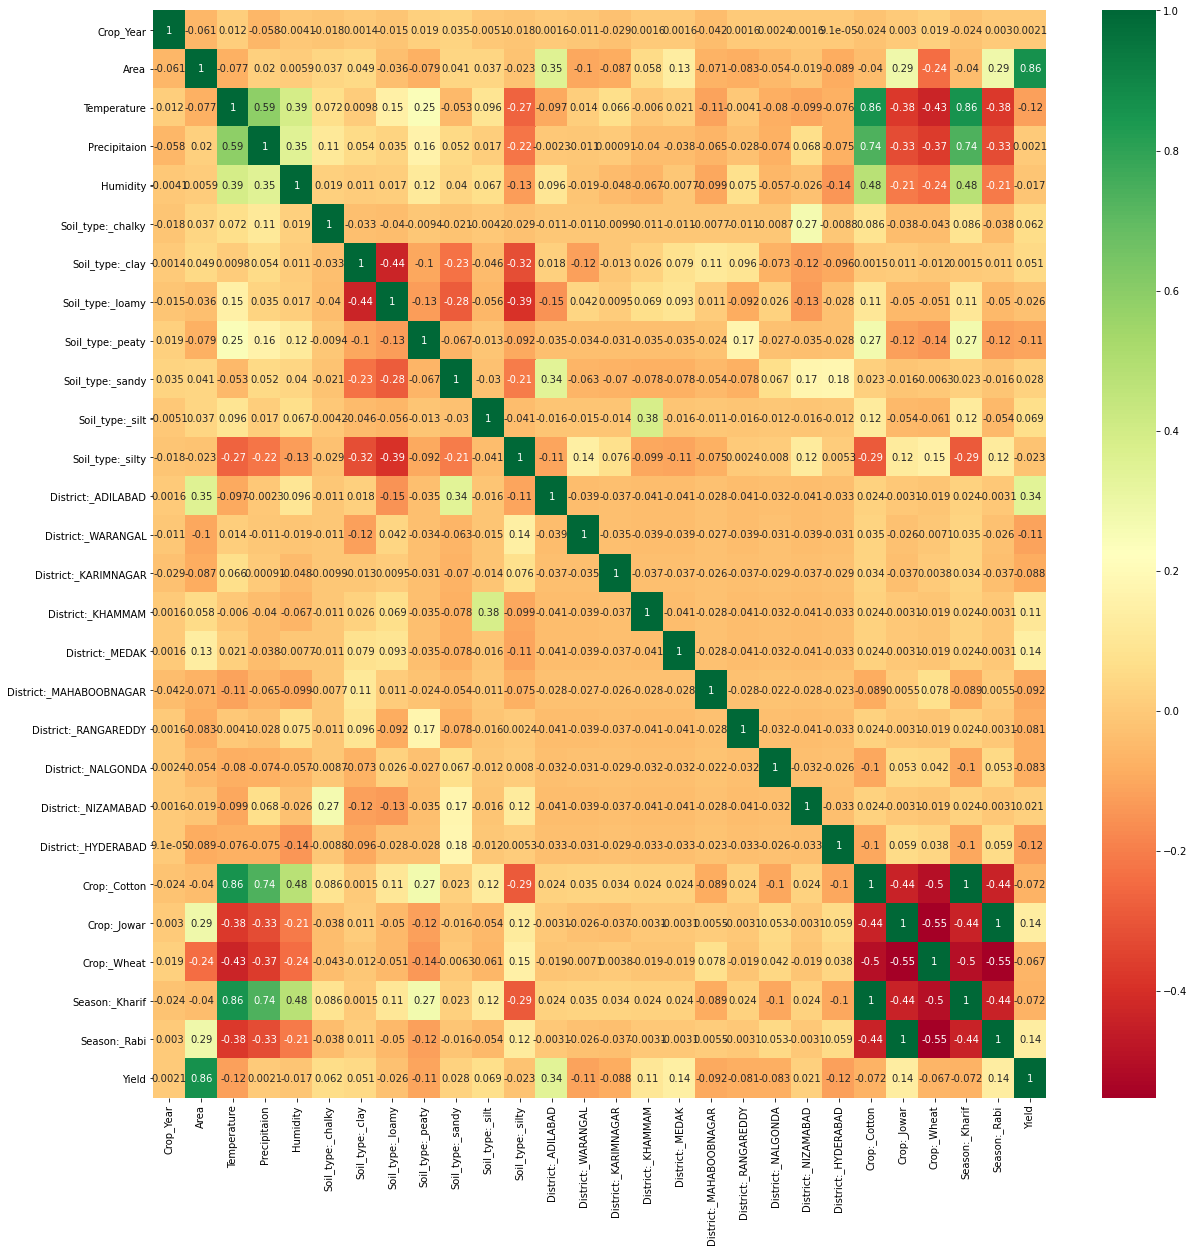

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [4]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [5]:

### Feature Importance

from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [6]:
print(model.feature_importances_)

[3.13679758e-02 8.13266337e-01 2.16524159e-02 2.12438336e-02
 2.06986643e-02 1.47289817e-04 3.85124156e-03 4.56539255e-03
 2.20434948e-04 4.78585491e-03 7.80858311e-04 5.59701057e-03
 2.87832341e-02 4.07971407e-04 1.79020737e-04 2.23426804e-03
 3.19541351e-03 2.36556933e-04 2.91966170e-04 1.75430507e-03
 2.07638710e-03 6.55643926e-05 1.70839374e-03 2.08192921e-03
 2.55344432e-02 1.46938459e-03 1.80385201e-03]


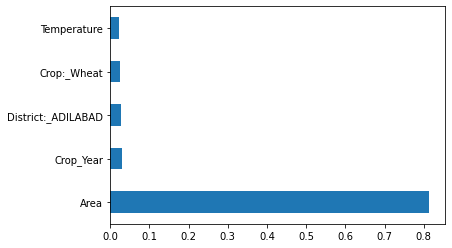

In [7]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [9]:

from sklearn.ensemble import RandomForestRegressor


In [10]:
import numpy as np
regressor=RandomForestRegressor()

In [11]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [12]:

from sklearn.model_selection import RandomizedSearchCV

In [13]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [14]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [15]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [16]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [17]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [18]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 15}

In [19]:
rf_random.best_score_

-623400045.6964884

In [20]:

predictions=rf_random.predict(X_test)

C:\Users\srinath goud\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Yield', ylabel='Density'>

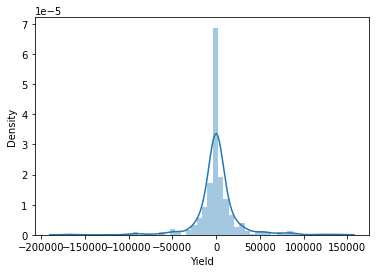

In [21]:
sns.distplot(y_test-predictions)

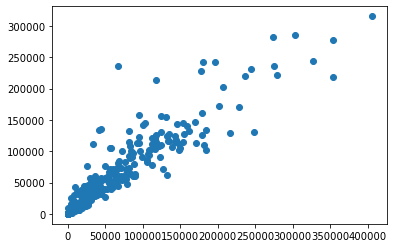

In [22]:
plt.scatter(y_test,predictions)

In [23]:
from sklearn import metrics

In [24]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 12278.506231841051
MSE: 580010174.2345351
RMSE: 24083.400387705533


In [25]:

import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

In [26]:
mod=pickle.load(open('random_forest_regression_model.pkl','rb'))

In [27]:
print(X_test.head())
print(X_test.columns)

      Crop_Year    Area  Temperature  Precipitaion  Humidity  \
1228       1997   21400      24.9829       44.1356        47   
330        2013  255900      24.1245       29.9194        29   
1215       2002   64700      24.0096       31.8174        43   
438        2011     100      24.3241       15.6864        42   
1314       2001   15100      23.6184       29.2230        20   

      Soil_type:_chalky  Soil_type:_clay  Soil_type:_loamy  Soil_type:_peaty  \
1228                  0                0                 1                 0   
330                   0                0                 1                 0   
1215                  0                1                 0                 0   
438                   0                0                 0                 0   
1314                  0                0                 0                 0   

      Soil_type:_sandy  ...  District:_MAHABOOBNAGAR  District:_RANGAREDDY  \
1228                 0  ...                        0    

In [28]:
mod.predict([[2021,598400,24.243,42.3484,84,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1]])

array([273621.79256957])

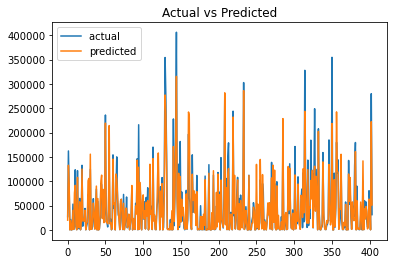

In [29]:
dm = pd.DataFrame({'Actual': y_test, 'Predicted': predictions}).reset_index()
x_axis=dm.index
y_axis=dm.Actual
y1_axis=dm.Predicted
plt.plot(x_axis,y_axis)
plt.plot(x_axis,y1_axis)
plt.title("Actual vs Predicted")
plt.legend(["actual ","predicted"])
b=plt.show()
b

In [30]:
#accuracy
metrics.r2_score(y_test,predictions)

0.8647758627174826